In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn

from astropy.visualization import make_lupton_rgb

In [28]:
class CNN(nn.Module):
    """
    Convolutional Neural Network for multiband data. Note that you
    will need to update the number of in_features for self.fc3.
    """
    def __init__(self, in_channels, num_classes):
        """
		Args:
		    in_channels: number of bands (gri = 3, griz=4)
			num_classes: number of unique labels in your dataset
		"""
        super(CNN, self).__init__()
        
        #Network Components
        self.conv1 = nn.Conv2d(in_channels=in_channels, 
                               out_channels=48, 
                               kernel_size=15, 
                               stride=3,
                               padding=2)

        self.conv2 = nn.Conv2d(in_channels=48, 
                               out_channels=96,
                               kernel_size=5, 
                               stride=1,
                               padding=2)
        
        self.dropout1 = nn.Dropout2d(0.25)
        
        self.dropout2 = nn.Dropout2d(0.5)
        
        self.fc1 = nn.Linear(in_features=3456, 
                             out_features=408)

        self.fc2 = nn.Linear(in_features=408, 
                             out_features=25)

        self.fc3 = nn.Linear(in_features=25, 
                             out_features=num_classes)


    def forward(self, x):
        #Network Flow
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

    def init_weights(self, m):
        if (type(m) == nn.Linear or type(m) == nn.Conv2d):
            torch.nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0.01)

In [29]:
cnn = CNN(in_channels=3, num_classes=2)

In [30]:
name = '14/model.pt'
name_saved_model = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/models/exp/' + name #'model.pt'
cnn = torch.load(name_saved_model)

In [31]:
weight_tensor = cnn.conv1.weight.data
print(type(weight_tensor))
print(weight_tensor.shape)
first = weight_tensor[0]
print(first.shape)

<class 'torch.Tensor'>
torch.Size([48, 3, 15, 15])
torch.Size([3, 15, 15])


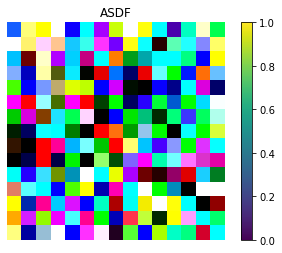

In [32]:
npimg = np.array(first.numpy(), np.float32)
#standardize the numpy image
npimg = (npimg - np.mean(npimg)) / np.std(npimg)
npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
npimg = npimg.transpose((1, 2, 0))

plt.figure()
plt.axis('off')
plt.title('ASDF')
plt.imshow(npimg)
plt.colorbar()
plt.show()



In [99]:
def plot_weights(weight_tensor, multi):
    plt.figure(figsize=(16,20)) 
    if(multi):
        for i in range(len(weight_tensor)):
            first = weight_tensor[i]
            #print(first)
            #print(torch.min(first))
            #print(torch.max(first))
            npimg = np.array(first.numpy(), np.float32)
            #standardize the numpy image
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            npimg = npimg.transpose((1, 2, 0))
            #print(npimg)
            #print(np.min(npimg))
            #print(np.max(npimg))
            
            npimg = np.array(first.numpy(), np.float32)
            img = make_lupton_rgb(npimg[0], npimg[1], npimg[2])
            plt.subplot(8,6,i+1)
            plt.axis('off')
            plt.imshow(img)
        plt.show()
    else:
        for i in range(len(weight_tensor)): 
            plt.subplot(8,6,i+1)
            plt.axis('off')
            plt.imshow(weight_tensor[i])
        plt.show()

0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0


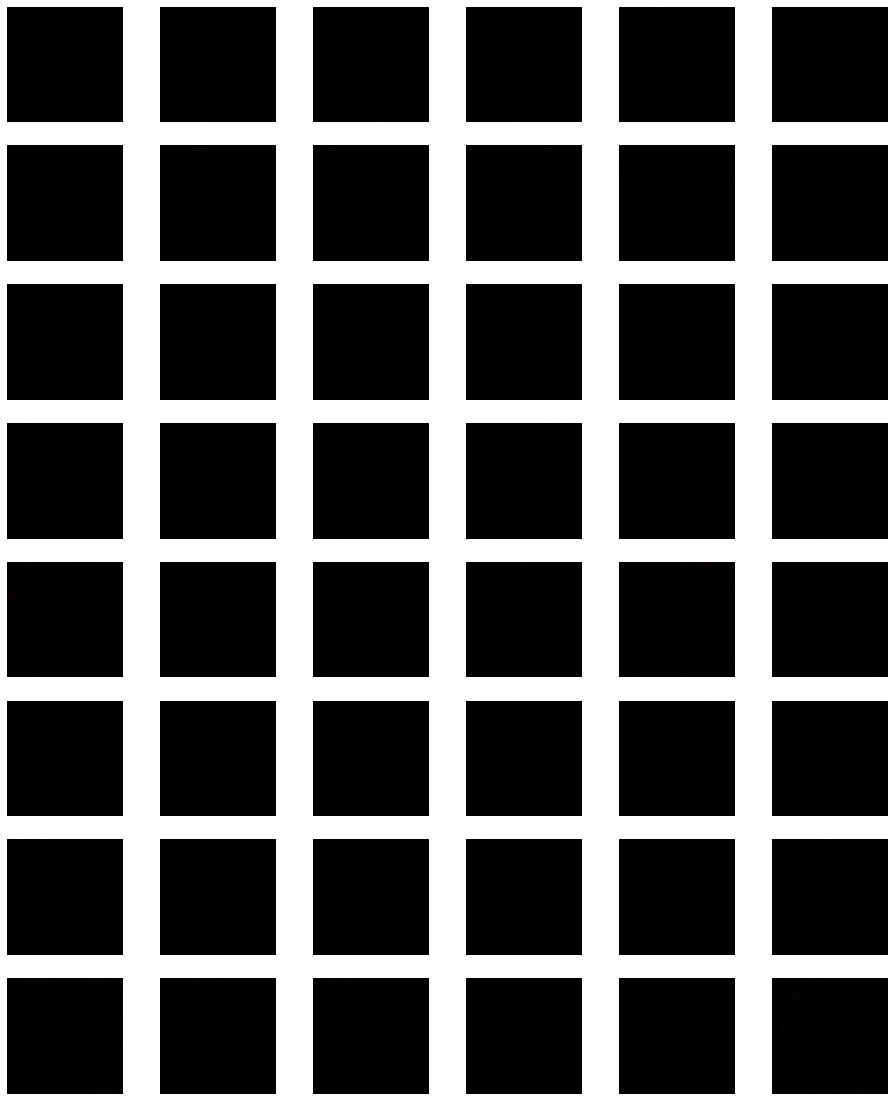

In [100]:
weight_tensor = cnn.conv1.weight.data
plot_weights(weight_tensor, multi=True)

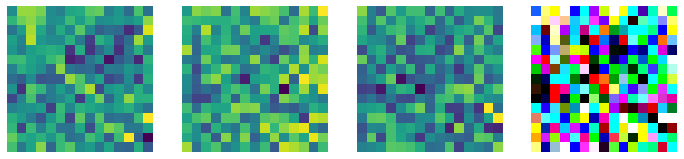

In [105]:
weight_tensor = cnn.conv1.weight.data
element = weight_tensor[0]

plt.figure(figsize=(12,9))

plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(element[0])

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(element[1])

plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(element[2])

plt.subplot(1,4,4)
npimg = np.array(element.numpy(), np.float32)
#standardize the numpy image
npimg = (npimg - np.mean(npimg)) / np.std(npimg)
npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
npimg = npimg.transpose((1, 2, 0))
#rgb = make_lupton_rgb(element[0], element[1], element[2], minimum = -0.1, stretch=100, Q=100)
plt.axis('off')
plt.imshow(npimg)

plt.show()

In [42]:
weight_tensor = cnn.conv2.weight.data
print(type(weight_tensor))
print(weight_tensor.shape)
weight_tensor = weight_tensor[0]

print(weight_tensor.shape)
img = weight_tensor[0]
print(img.shape)

<class 'torch.Tensor'>
torch.Size([96, 48, 5, 5])
torch.Size([48, 5, 5])
torch.Size([5, 5])


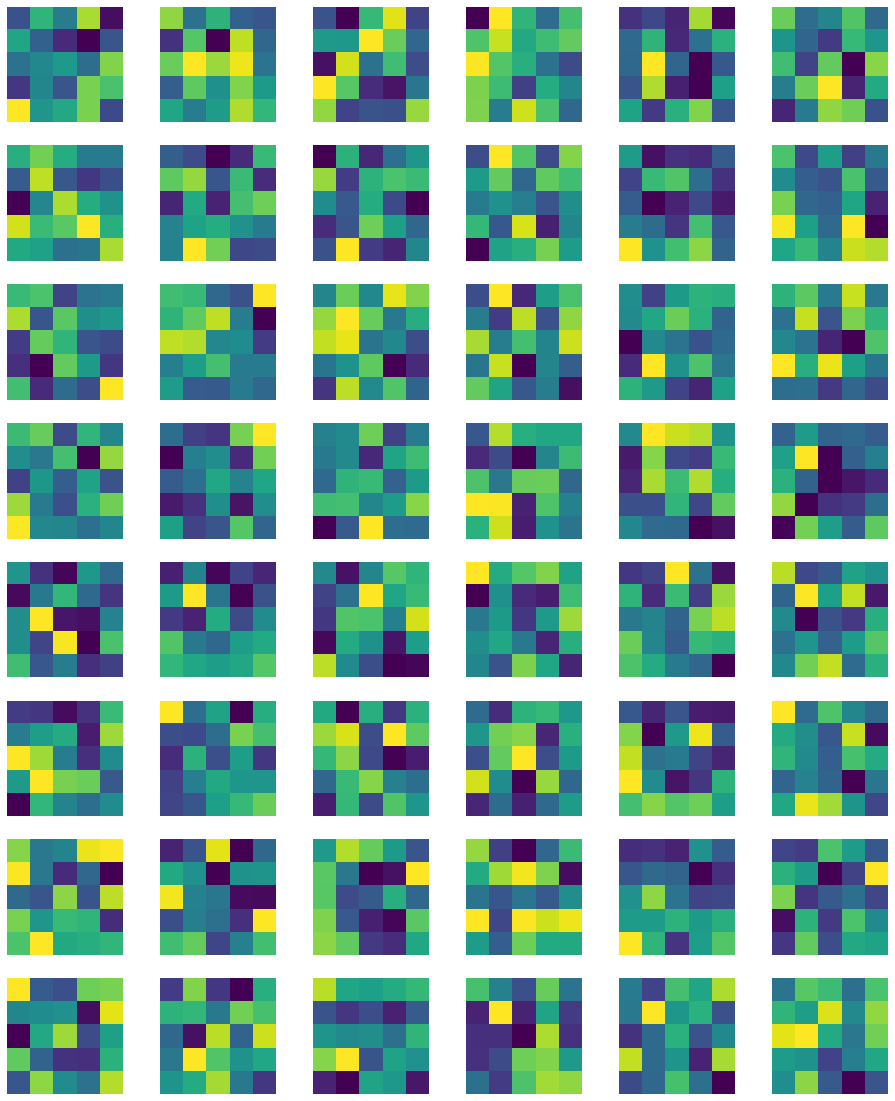

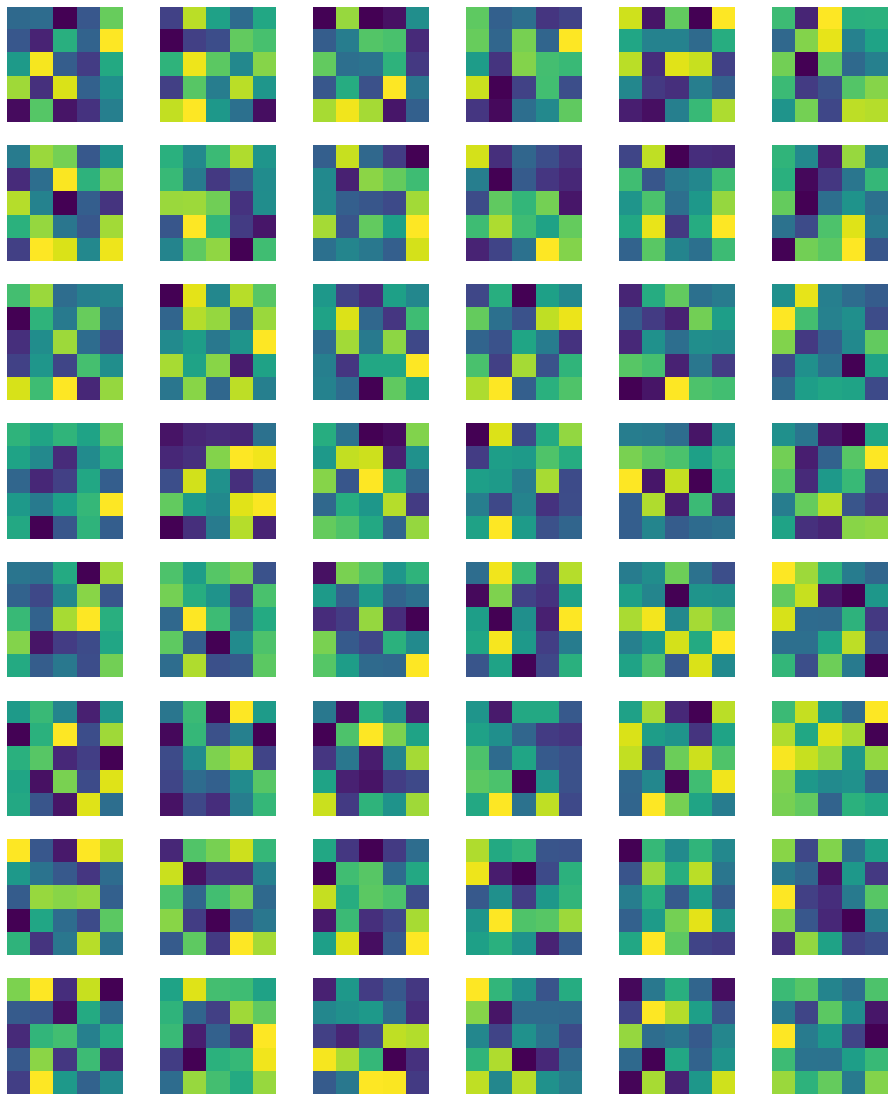

KeyboardInterrupt: 

In [43]:
weight_tensor = cnn.conv2.weight.data
for j in range(len(weight_tensor)):
    plot_weights(weight_tensor[j], multi=False)